In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = sns.load_dataset('titanic')


In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    string  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4), string(1)
memory usage: 80.7+ KB


In [11]:
df['sex']= df['sex'].astype('string')

In [13]:
df['embarked']=df['embarked'].astype('string')

In [14]:
df['who']=df['who'].astype('string')

In [15]:
df['alive']=df['alive'].astype('string')

In [16]:
df['who']=df['who'].astype('string')

In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [21]:
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df['age'].fillna(df['age'].mean(), inplace=True)


In [31]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0]) #since not numberic need to take mode()[0]


In [32]:
df['deck'].unique

<bound method Series.unique of 0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']>

In [33]:
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

In [35]:
df.dtypes

survived                int64
pclass                  int64
sex            string[python]
age                   float64
sibsp                   int64
parch                   int64
fare                  float64
embarked       string[python]
class                category
who            string[python]
adult_male               bool
deck                 category
embark_town            object
alive          string[python]
alone                    bool
dtype: object

In [41]:
count_female = (df['sex'] == 'female').sum()
count_male = (df['sex'] == 'male').sum()
print('Female:',count_female)
print('Male:',count_male)

Female: 314
Male: 577


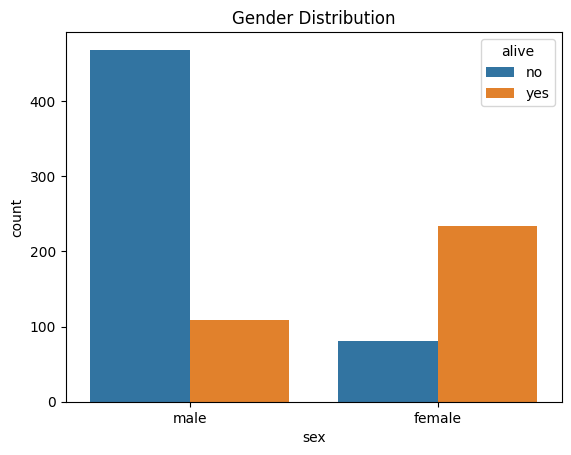

In [49]:
sns.countplot(x='sex',hue='alive',data=df) #categorical data tells count of frequency
plt.title("Gender Distribution")
plt.show()

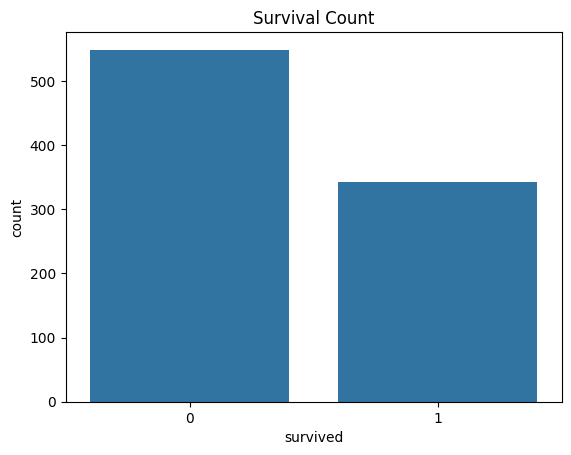

In [50]:
sns.countplot(x='survived',data=df)
plt.title("Survival Count")
plt.show()

In [ ]:
sns.barplot(x='sex',y='survived',data=df)
plt.title("Gender-wise Survived")
plt.show()

In [ ]:
sns.barplot(x='class',y='survived',data=df)
plt.title("Class-Wise Survival Rate")
plt.show()

In [ ]:
sns.histplot(df['fare'], bins=30)
plt.title("Ticket Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

In [ ]:
sns.scatterplot(x='fare', y='survived', data=df) # to check the 2 numerical variables ka relationship check karna ho
plt.title("Fare vs Survival")
plt.show()

In [ ]:
sns.countplot(x='pclass', data=df)
plt.title("Passenger Count by Class")
plt.show()

In [ ]:
sns.histplot(data=df, x='age', hue='survived', bins=30)
plt.title("Age Distribution by Survival")
plt.show()

In [ ]:
sns.boxplot(data=df,x="survived",y="fare")

In [ ]:
sns.histplot(data=df, x="fare")